In [20]:
import pandas as pd
import numpy as np
import copy
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style = "white", color_codes = True)
import matplotlib.pyplot as plt

data_path = 'D:/GitHub/3rd-ML100Days/HomeWork/Data/'
train_data = pd.read_csv(data_path + 'train_data.csv')
test_data = pd.read_csv(data_path + 'test_features.csv')

names = test_data['name']
target_data = train_data['poi']

train_data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


Data Visualizations

In [21]:
train_data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


bonus
count    6.100000e+01
mean     1.147436e+06
std      1.505189e+06
min      7.000000e+04
25%      4.500000e+05
50%      7.500000e+05
75%      1.000000e+06
max      8.000000e+06
Name: bonus, dtype: float64


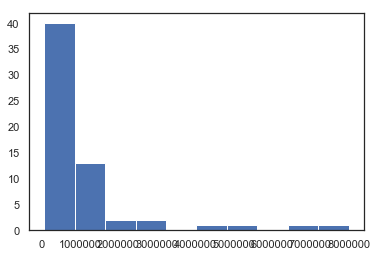

None
deferral_payments
count    2.800000e+01
mean     6.344374e+05
std      8.603646e+05
min     -1.025000e+05
25%      7.656750e+04
50%      1.951900e+05
75%      8.342052e+05
max      2.964506e+06
Name: deferral_payments, dtype: float64


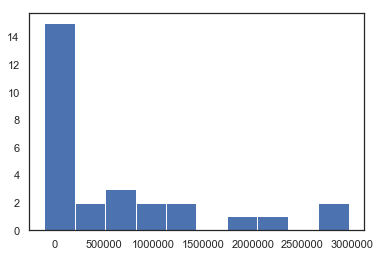

None
deferred_income
count    3.400000e+01
mean    -4.625664e+05
std      8.095392e+05
min     -3.504386e+06
25%     -5.527032e+05
50%     -1.175340e+05
75%     -2.708325e+04
max     -1.042000e+03
Name: deferred_income, dtype: float64


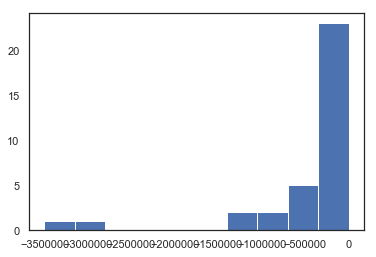

None
director_fees
count        13.000000
mean      89397.846154
std       41143.391399
min        3285.000000
25%      101250.000000
50%      108579.000000
75%      112492.000000
max      125034.000000
Name: director_fees, dtype: float64


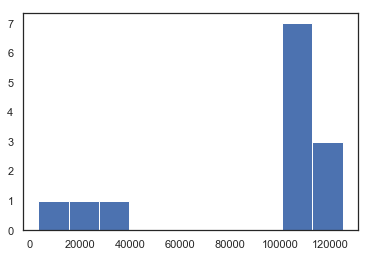

None
exercised_stock_options
count    8.100000e+01
mean     2.985081e+06
std      6.004174e+06
min      3.285000e+03
25%      4.004780e+05
50%      8.500100e+05
75%      2.165172e+06
max      3.434838e+07
Name: exercised_stock_options, dtype: float64


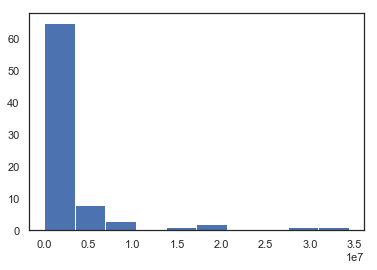

None
expenses
count        73.000000
mean      51040.547945
std       47596.682104
min         148.000000
25%       18834.000000
50%       41953.000000
75%       59175.000000
max      228763.000000
Name: expenses, dtype: float64


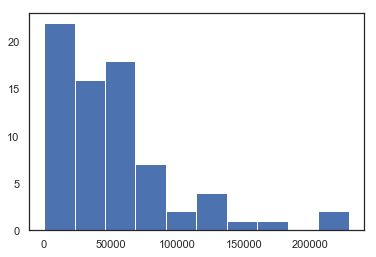

None
from_messages
count       65.000000
mean       711.323077
std       2074.497628
min         12.000000
25%         19.000000
50%         45.000000
75%        215.000000
max      14368.000000
Name: from_messages, dtype: float64


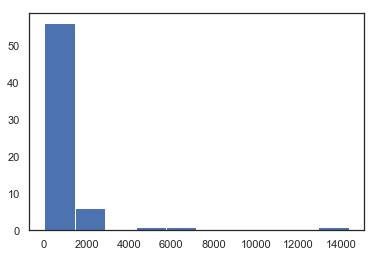

None
from_poi_to_this_person
count     65.000000
mean      64.800000
std       91.863214
min        0.000000
25%       10.000000
50%       28.000000
75%       88.000000
max      528.000000
Name: from_poi_to_this_person, dtype: float64


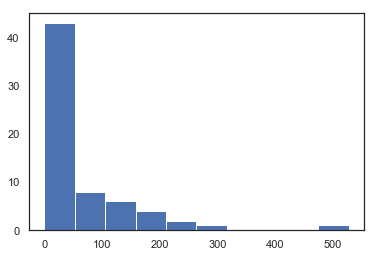

None
from_this_person_to_poi
count     65.000000
mean      40.092308
std       88.901407
min        0.000000
25%        0.000000
50%        7.000000
75%       27.000000
max      411.000000
Name: from_this_person_to_poi, dtype: float64


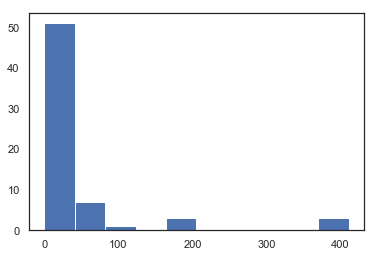

None
loan_advances
count    2.000000e+00
mean     4.096250e+07
std      5.736404e+07
min      4.000000e+05
25%      2.068125e+07
50%      4.096250e+07
75%      6.124375e+07
max      8.152500e+07
Name: loan_advances, dtype: float64


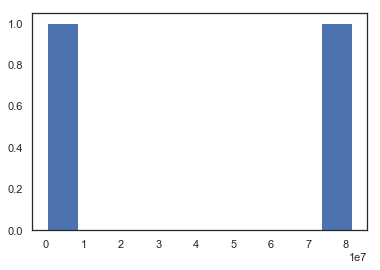

None
long_term_incentive
count    4.900000e+01
mean     7.926171e+05
std      9.504645e+05
min      7.102300e+04
25%      2.750000e+05
50%      4.221580e+05
75%      8.318090e+05
max      5.145434e+06
Name: long_term_incentive, dtype: float64


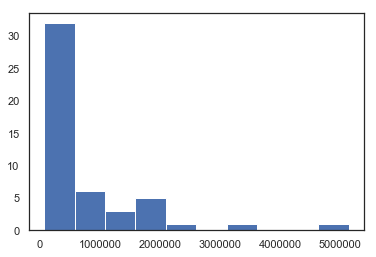

None
other
count    6.900000e+01
mean     4.471774e+05
std      1.341564e+06
min      2.000000e+00
25%      9.720000e+02
50%      5.238200e+04
75%      3.620960e+05
max      1.035973e+07
Name: other, dtype: float64


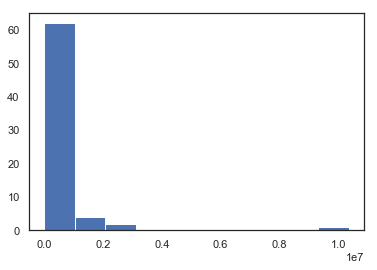

None
restricted_stock
count    8.200000e+01
mean     1.294855e+06
std      2.498335e+06
min      4.409300e+04
25%      2.689220e+05
50%      4.628225e+05
75%      9.664905e+05
max      1.476169e+07
Name: restricted_stock, dtype: float64


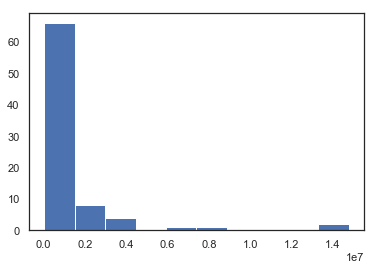

None
restricted_stock_deferred
count        10.000000
mean    -221885.700000
std      205191.374121
min     -560222.000000
25%     -389621.750000
50%     -139856.500000
75%      -77953.250000
max       44093.000000
Name: restricted_stock_deferred, dtype: float64


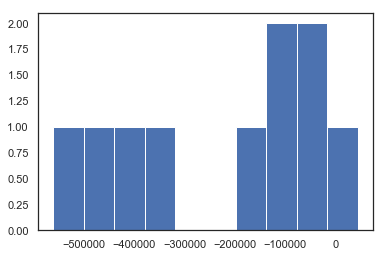

None
salary
count    7.300000e+01
mean     2.739025e+05
std      1.716647e+05
min      4.770000e+02
25%      2.061210e+05
50%      2.516540e+05
75%      2.885890e+05
max      1.111258e+06
Name: salary, dtype: float64


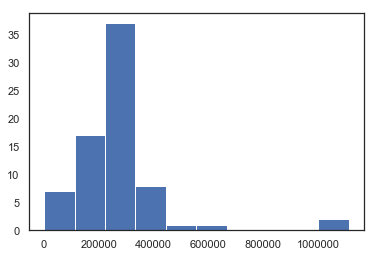

None
shared_receipt_with_poi
count      65.000000
mean     1111.369231
std      1165.852016
min         2.000000
25%       178.000000
50%       599.000000
75%      1902.000000
max      4527.000000
Name: shared_receipt_with_poi, dtype: float64


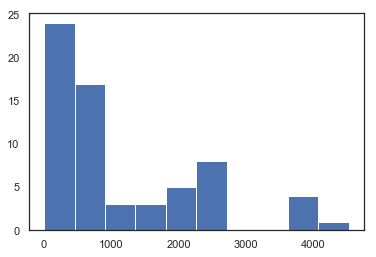

None
to_messages
count       65.000000
mean      2156.061538
std       2811.676718
min         57.000000
25%        517.000000
50%       1088.000000
75%       2649.000000
max      15149.000000
Name: to_messages, dtype: float64


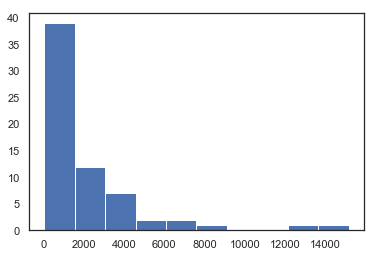

None
total_payments
count    9.600000e+01
mean     2.590977e+06
std      1.056645e+07
min      1.480000e+02
25%      3.024025e+05
50%      1.106740e+06
75%      1.985668e+06
max      1.035598e+08
Name: total_payments, dtype: float64


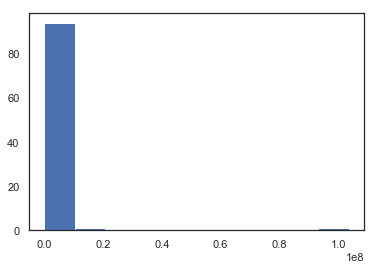

None
total_stock_value
count    9.800000e+01
mean     3.527136e+06
std      7.182997e+06
min     -4.409300e+04
25%      4.211518e+05
50%      9.979710e+05
75%      2.493616e+06
max      4.911008e+07
Name: total_stock_value, dtype: float64


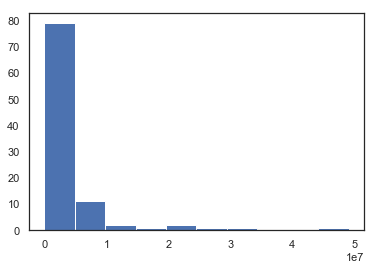

None


In [22]:
import matplotlib.pyplot as plt

num_features = []
for dtype, feature in zip(train_data.dtypes, train_data.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(dtype)
        
num_features = list(train_data.columns[list(train_data.dtypes.isin(num_features))])
num_features = list(train_data[num_features].columns[list(train_data[num_features].apply(lambda x:len(x.unique())!=2 ))])
for col in num_features:
    plt.hist(train_data[col])
    print(col)
    print(train_data[col].describe())
    print(plt.show())

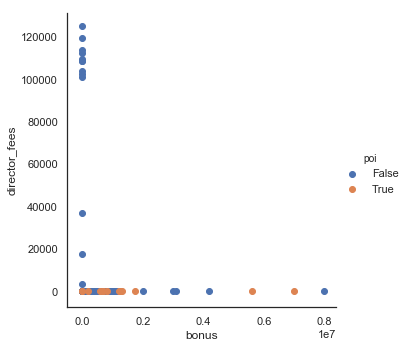

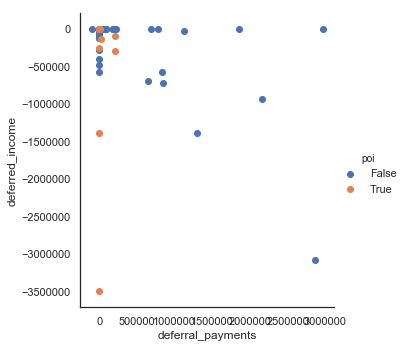

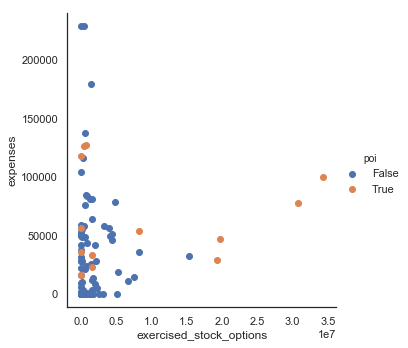

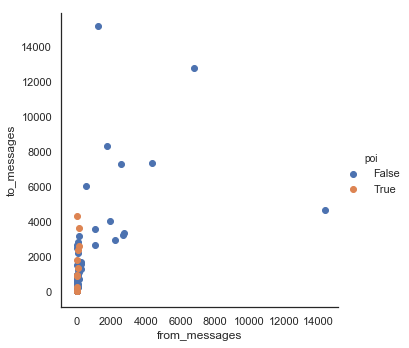

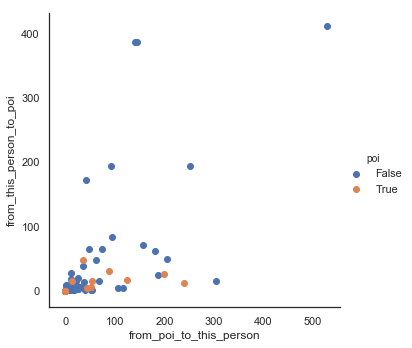

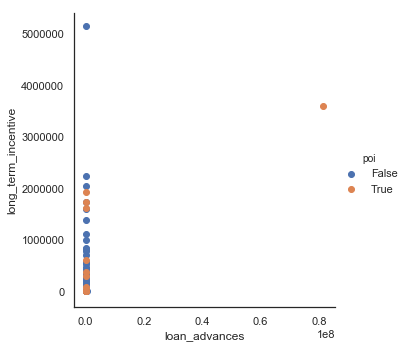

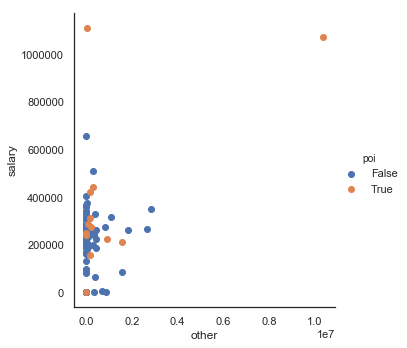

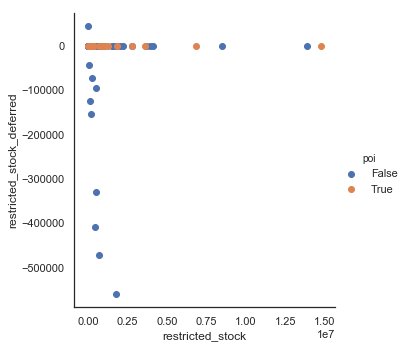

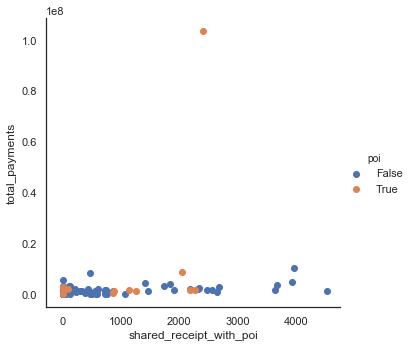

In [23]:
# bonus
# deferral_payments
# deferred_income
# director_fees
# exercised_stock_options
# expenses
# from_messages
# from_poi_to_this_person
# from_this_person_to_poi
# loan_advances
# long_term_incentive
# other
# poi
# restricted_stock
# restricted_stock_deferred
# salary
# shared_receipt_with_poi
# to_messages
# total_payments
# total_stock_value

# FacetGrid

df = train_data

MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
df.head()

sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "bonus", "director_fees") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "deferral_payments", "deferred_income") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "exercised_stock_options", "expenses") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "from_messages", "to_messages") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "from_poi_to_this_person", "from_this_person_to_poi") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "loan_advances", "long_term_incentive") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "other", "salary") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "restricted_stock", "restricted_stock_deferred") \
   .add_legend()
sns.FacetGrid(train_data, hue = "poi", size = 5) \
   .map(plt.scatter, "shared_receipt_with_poi", "total_payments") \
   .add_legend()

# bonus
# director_fees
# loan_advances
# restricted_stock_deferred
# restricted_stock

Data Preprocessing

In [24]:
# Missing Data
# ['bonus', 'director_fees', 'loan_advances', 'restricted_stock_deferred', 'restricted_stock', 'long_term_incentive']
test_data = test_data.drop(['name', 'email_address'], axis=1)
train_data = train_data.drop(['poi', 'name', 'email_address'], axis=1)
# train_data["total_payments"] = train_data[train_data["total_payments"] < 10**8]["total_payments"]
# train_data["from_messages"] = train_data["from_messages"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["salary"] = train_data["salary"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["other"] = train_data["other"].map(lambda i: np.log(i) if i > 0 else 0)

# 去偏態
# 右偏 ['bonus', 'deferral_payments', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'to_messages', 'total_payments', 'total_stock_value']
# right_skewed = ['bonus', 'deferral_payments', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'long_term_incentive', 'other', 'restricted_stock', 'salary', 'to_messages', 'total_payments', 'total_stock_value']
right_skewed = ['deferral_payments', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other', 'salary', 'to_messages', 'total_payments', 'total_stock_value']
for col in right_skewed:
    train_data[col] = train_data[col].map(lambda i: np.log(i) if i > 0 else 0)
# 左偏 ['deferred_income']
left_skewed = ['deferred_income']
for col in left_skewed:
    train_data[col] = train_data[col].map(lambda i: np.log(-i) if i > 0 else 0)

# test_data = test_data.drop(['name', 'email_address'], axis=1)
# train_data = train_data.drop(['poi', 'name', 'email_address'], axis=1)
    
df = train_data

LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna(-1)
        df[c] = LEncoder.fit_transform(list(df[c].values))
    else :
        df[c] = df[c].fillna(df[c].mean())
df.head()

estimator = RandomForestClassifier()
estimator.fit(df.values, target_data)
feats = pd.Series(data=estimator.feature_importances_, index=df.columns)
feats = feats.sort_values(ascending=False)
print(feats)

train_data = df
# train_data["bonus"] = train_data["bonus"].fillna(train_data['bonus'].mean())
# train_data["deferral_payments"] = train_data["deferral_payments"].fillna(train_data['deferral_payments'].mean())
# train_data["deferred_income"] = train_data["deferred_income"].fillna(train_data['deferred_income'].mean())
# train_data["director_fees"] = train_data["director_fees"].fillna(train_data['director_fees'].mean())
# train_data["exercised_stock_options"] = train_data["exercised_stock_options"].fillna(train_data['exercised_stock_options'].mean())
# train_data["expenses"] = train_data["expenses"].fillna(train_data['expenses'].mean())
# train_data["from_messages"] = train_data["from_messages"].fillna(train_data['from_messages'].mean())
# train_data["from_poi_to_this_person"] = train_data["from_poi_to_this_person"].fillna(train_data['from_poi_to_this_person'].mean())
# train_data["from_this_person_to_poi"] = train_data["from_this_person_to_poi"].fillna(train_data['from_this_person_to_poi'].mean())
# train_data["loan_advances"] = train_data["loan_advances"].fillna(train_data['loan_advances'].mean())
# train_data["long_term_incentive"] = train_data["long_term_incentive"].fillna(train_data['long_term_incentive'].mean())
# train_data["other"] = train_data["other"].fillna(train_data['other'].mean())
# train_data["restricted_stock"] = train_data["restricted_stock"].fillna(train_data['restricted_stock'].mean())
# train_data["restricted_stock_deferred"] = train_data["restricted_stock_deferred"].fillna(train_data['restricted_stock_deferred'].mean())
# train_data["salary"] = train_data["salary"].fillna(train_data['salary'].mean())
# train_data["shared_receipt_with_poi"] = train_data["shared_receipt_with_poi"].fillna(train_data['shared_receipt_with_poi'].mean())
# train_data["to_messages"] = train_data["to_messages"].fillna(train_data['to_messages'].mean())
# train_data["total_payments"] = train_data["total_payments"].fillna(train_data['total_payments'].mean())
# train_data["total_stock_value"] = train_data["total_stock_value"].fillna(train_data['total_stock_value'].mean())

# print(train_data.shape, test_data.shape)

# 移除 Outlier
# total_payments
# train_data["total_payments"] = train_data[train_data["total_payments"] < 10**8]["total_payments"]
# sns.FacetGrid(train_data, hue = "poi", size = 5) \
#    .map(plt.scatter, "total_payments", "total_stock_value") \
#    .add_legend()
#other

# 去偏態
# 靠左 exercised_stock_options、from_messages、from_poi_to_this_person、restricted_stock、to_messages、total_stock_value
# plt.hist(train_data["exercised_stock_options"])
# print(plt.show())
# train_data["exercised_stock_options"] = train_data["exercised_stock_options"].map(lambda i: np.log(i) if i > 0 else 0)
# plt.hist(train_data["exercised_stock_options"])
# print(plt.show())

# Decision Tree 0.93
# train_data["exercised_stock_options"] = train_data["exercised_stock_options"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["from_messages"] = train_data["from_messages"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["from_poi_to_this_person"] = train_data["from_poi_to_this_person"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["restricted_stock"] = train_data["restricted_stock"].map(lambda i: np.log(i) if i > 0 else 0)
# Decision Tree 0.93
# train_data["to_messages"] = train_data["to_messages"].map(lambda i: np.log(i) if i > 0 else 0)
# train_data["total_stock_value"] = train_data["total_stock_value"].map(lambda i: np.log(i) if i > 0 else 0)

# 只取數字型特徵
# train_data = train_data[num_features]
# test_data = test_data[num_features]

# 移除 loan_advances 因為資料中只有兩筆資料
# train_data = train_data.drop(['loan_advances'] , axis=1)
# test_data = test_data.drop(['loan_advances'] , axis=1)

print(train_data.shape, test_data.shape)

# test_data["bonus"] = test_data["bonus"].fillna(test_data['bonus'].mean())
# test_data["deferral_payments"] = test_data["deferral_payments"].fillna(test_data['deferral_payments'].mean())
# test_data["deferred_income"] = test_data["deferred_income"].fillna(test_data['deferred_income'].mean())
# test_data["director_fees"] = test_data["director_fees"].fillna(test_data['director_fees'].mean())
# test_data["exercised_stock_options"] = test_data["exercised_stock_options"].fillna(test_data['exercised_stock_options'].mean())
# test_data["expenses"] = test_data["expenses"].fillna(test_data['expenses'].mean())
# test_data["from_messages"] = test_data["from_messages"].fillna(test_data['from_messages'].mean())
# test_data["from_poi_to_this_person"] = test_data["from_poi_to_this_person"].fillna(test_data['from_poi_to_this_person'].mean())
# test_data["from_this_person_to_poi"] = test_data["from_this_person_to_poi"].fillna(test_data['from_this_person_to_poi'].mean())
# test_data["loan_advances"] = test_data["loan_advances"].fillna(test_data['loan_advances'].mean())
# test_data["long_term_incentive"] = test_data["long_term_incentive"].fillna(test_data['long_term_incentive'].mean())
# test_data["other"] = test_data["other"].fillna(test_data['other'].mean())
# test_data["restricted_stock"] = test_data["restricted_stock"].fillna(test_data['restricted_stock'].mean())
# test_data["restricted_stock_deferred"] = test_data["restricted_stock_deferred"].fillna(test_data['restricted_stock_deferred'].mean())
# test_data["salary"] = test_data["salary"].fillna(test_data['salary'].mean())
# test_data["shared_receipt_with_poi"] = test_data["shared_receipt_with_poi"].fillna(test_data['shared_receipt_with_poi'].mean())
# test_data["to_messages"] = test_data["to_messages"].fillna(test_data['to_messages'].mean())
# test_data["total_payments"] = test_data["total_payments"].fillna(test_data['total_payments'].mean())
# test_data["total_stock_value"] = test_data["total_stock_value"].fillna(test_data['total_stock_value'].mean())

# print(train_data.isnull().sum())

# Outlier
# 檢查數值特徵是否有 Outlier
# print(train_data["bonus"].describe())
# train_data["bonus"] = train_data[train_data["bonus"] < np.percentile(train_data["bonus"], 75)]['bonus']
# sns.boxplot(x = "poi", y = "bonus", data = train_data)
# print(train_data["total_payments"].describe())
# train_data["total_payments"] = train_data[train_data["total_payments"] < 10**7]['total_payments']
# sns.boxplot(x = "poi", y = "total_payments", data = train_data)

# Categorical Variable/Dummy Variables
# 使用 One-hot encoding 將非數值特徵轉換為數值特徵，例如：將星期轉為 1~7 的數字
# 不過 One-hot encoding 只適合運用在類型種類固定的特徵，當類型種類過多時，不適用 One-hot encoding

# Noise Handle

total_stock_value            0.157838
expenses                     0.151283
salary                       0.101354
exercised_stock_options      0.090002
other                        0.088856
restricted_stock             0.065770
bonus                        0.065060
shared_receipt_with_poi      0.063875
total_payments               0.056363
from_this_person_to_poi      0.053502
to_messages                  0.033612
from_messages                0.028926
long_term_incentive          0.027820
from_poi_to_this_person      0.014525
deferral_payments            0.001213
restricted_stock_deferred    0.000000
director_fees                0.000000
deferred_income              0.000000
loan_advances                0.000000
dtype: float64
(113, 19) (33, 19)


Feature Engineering

In [25]:
# https://github.com/dnc1994/Kaggle-Playground/blob/master/features.ipynb

# Feature Selection
# 可以使用 RandomForest 查看 Feature Importance 進行篩選

# Feature Encoding

Split Data

In [26]:
train_data[:] = np.nan_to_num(train_data)
test_data[:] = np.nan_to_num(test_data)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.25, random_state = 4)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((84, 19), (84,), (29, 19), (29,))

Model Selection

In [27]:
# print(train_data.isnull().sum())
# Gradient Boosting
# Random Forest
# Extra Randomized Trees
# SVM
# Linear Regression
# Logistic Regression
# Neural Networks
# Xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve


from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('GaussianNB, accuracy_score = ', accuracy_score(y_test, predict))
print('GaussianNB, score = ', model.score(x_test, y_test))


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('KNeighborsClassifier, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('RandomForestClassifier, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('LogisticRegression, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('LogisticRegressionCV, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('SVC, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('DecisionTreeClassifier, accuracy_score = ', accuracy_score(y_test, predict))


from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
predict = model.predict(x_test)
print('DecisionTreeRegressor, accuracy_score = ', accuracy_score(y_test, predict))

GaussianNB, accuracy_score =  0.7586206896551724
GaussianNB, score =  0.7586206896551724
KNeighborsClassifier, accuracy_score =  0.8620689655172413
RandomForestClassifier, accuracy_score =  0.8275862068965517
LogisticRegression, accuracy_score =  0.7241379310344828
LogisticRegressionCV, accuracy_score =  0.7241379310344828
SVC, accuracy_score =  0.8620689655172413
DecisionTreeClassifier, accuracy_score =  0.7241379310344828
DecisionTreeRegressor, accuracy_score =  0.7241379310344828


Feature Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score

cv_value=10

minMaxScaler = MinMaxScaler()
minMaxScaler_train_data = minMaxScaler.fit_transform(train_data)
print('MinMaxScaler, GaussianNB, cross_val_score = ', cross_val_score(GaussianNB(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, KNeighborsClassifier, cross_val_score = ', cross_val_score(KNeighborsClassifier(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, RandomForestClassifier, cross_val_score = ', cross_val_score(RandomForestClassifier(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, LogisticRegression, cross_val_score = ', cross_val_score(LogisticRegression(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, LogisticRegressionCV, cross_val_score = ', cross_val_score(LogisticRegressionCV(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, SVC, cross_val_score = ', cross_val_score(SVC(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('MinMaxScaler, DecisionTreeClassifier, cross_val_score = ', cross_val_score(DecisionTreeClassifier(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
# print('MinMaxScaler, DecisionTreeRegressor, cross_val_score = ', cross_val_score(DecisionTreeRegressor(), minMaxScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())

standardScaler = StandardScaler()
standardScaler_train_data = standardScaler.fit_transform(train_data)
print('StandardScaler, GaussianNB, cross_val_score = ', cross_val_score(GaussianNB(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, KNeighborsClassifier, cross_val_score = ', cross_val_score(KNeighborsClassifier(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, RandomForestClassifier, cross_val_score = ', cross_val_score(RandomForestClassifier(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, LogisticRegression, cross_val_score = ', cross_val_score(LogisticRegression(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, LogisticRegressionCV, cross_val_score = ', cross_val_score(LogisticRegressionCV(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, SVC, cross_val_score = ', cross_val_score(SVC(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('StandardScaler, DecisionTreeClassifier, cross_val_score = ', cross_val_score(DecisionTreeClassifier(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
# print('StandardScaler, DecisionTreeRegressor, cross_val_score = ', cross_val_score(DecisionTreeRegressor(), standardScaler_train_data, target_data, cv=cv_value, scoring='accuracy').mean())

normalizer = Normalizer()
normalizer_train_data = normalizer.fit_transform(train_data)
print('Normalizer, GaussianNB, cross_val_score = ', cross_val_score(GaussianNB(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, KNeighborsClassifier, cross_val_score = ', cross_val_score(KNeighborsClassifier(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, RandomForestClassifier, cross_val_score = ', cross_val_score(RandomForestClassifier(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, LogisticRegression, cross_val_score = ', cross_val_score(LogisticRegression(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, LogisticRegressionCV, cross_val_score = ', cross_val_score(LogisticRegressionCV(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, SVC, cross_val_score = ', cross_val_score(SVC(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('Normalizer, DecisionTreeClassifier, cross_val_score = ', cross_val_score(DecisionTreeClassifier(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
# print('Normalizer, DecisionTreeRegressor, cross_val_score = ', cross_val_score(DecisionTreeRegressor(), normalizer_train_data, target_data, cv=cv_value, scoring='accuracy').mean())

MinMaxScaler, GaussianNB, cross_val_score =  0.6106060606060606
MinMaxScaler, KNeighborsClassifier, cross_val_score =  0.8681818181818182
MinMaxScaler, RandomForestClassifier, cross_val_score =  0.8946969696969695
MinMaxScaler, LogisticRegression, cross_val_score =  0.8863636363636364
MinMaxScaler, LogisticRegressionCV, cross_val_score =  0.8689393939393939
MinMaxScaler, SVC, cross_val_score =  0.8863636363636364
MinMaxScaler, DecisionTreeClassifier, cross_val_score =  0.8318181818181818
StandardScaler, GaussianNB, cross_val_score =  0.6106060606060606
StandardScaler, KNeighborsClassifier, cross_val_score =  0.8863636363636364
StandardScaler, RandomForestClassifier, cross_val_score =  0.903030303030303
StandardScaler, LogisticRegression, cross_val_score =  0.8871212121212121
StandardScaler, LogisticRegressionCV, cross_val_score =  0.8780303030303032
StandardScaler, SVC, cross_val_score =  0.8863636363636364
StandardScaler, DecisionTreeClassifier, cross_val_score =  0.903030303030303
No

Principle Component Analysis

In [30]:
from sklearn.decomposition import PCA

cv_value=10
pca = PCA()
pca_train_data = pca.fit_transform(train_data)

print('GaussianNB, cross_val_score = ', cross_val_score(GaussianNB(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('KNeighborsClassifier, cross_val_score = ', cross_val_score(KNeighborsClassifier(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('RandomForestClassifier, cross_val_score = ', cross_val_score(RandomForestClassifier(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('LogisticRegression, cross_val_score = ', cross_val_score(LogisticRegression(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('LogisticRegressionCV, cross_val_score = ', cross_val_score(LogisticRegressionCV(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('SVC, cross_val_score = ', cross_val_score(SVC(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('DecisionTreeClassifier, cross_val_score = ', cross_val_score(DecisionTreeClassifier(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())
print('DecisionTreeRegressor, cross_val_score = ', cross_val_score(DecisionTreeRegressor(), pca_train_data, target_data, cv=cv_value, scoring='accuracy').mean())

GaussianNB, cross_val_score =  0.806060606060606
KNeighborsClassifier, cross_val_score =  0.8772727272727273
RandomForestClassifier, cross_val_score =  0.8863636363636364
LogisticRegression, cross_val_score =  0.8689393939393939
LogisticRegressionCV, cross_val_score =  0.8689393939393939
SVC, cross_val_score =  0.8863636363636364
DecisionTreeClassifier, cross_val_score =  0.825
DecisionTreeRegressor, cross_val_score =  0.7931818181818182


Model Training

In [32]:
# Gaussian Mixture
# Grid Search

# import numpy as np
# from sklearn.mixture import GaussianMixture

# x_all = np.r_[train_data, test_data]
# print('x_all shape :',x_all.shape)

# # USING THE GAUSSIAN MIXTURE MODEL 
# lowest_bic = np.infty
# bic = []
# n_components_range = range(1, 7)
# cv_types = ['spherical', 'tied', 'diag', 'full']
# for cv_type in cv_types:
#     for n_components in n_components_range:
#         gmm = GaussianMixture(n_components=n_components,covariance_type=cv_type)
#         gmm.fit(x_all)
#         bic.append(gmm.aic(x_all))
#         if bic[-1] < lowest_bic:
#             lowest_bic = bic[-1]
#             best_gmm = gmm
            
# best_gmm.fit(x_all)
# gmm_train = best_gmm.predict_proba(train_data)
# gmm_test = best_gmm.predict_proba(test_data)

# standardScaler = StandardScaler()
# train_data = standardScaler.fit_transform(train_data)
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.25, random_state = 4)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape

from sklearn.model_selection import GridSearchCV

param_grid_gnb = {
    
}
grid_search_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_search_gnb = grid_search_gnb.fit(x_train, y_train)
gnb_best = grid_search_gnb.best_estimator_
print('GaussianNB Accuracy = ', cross_val_score(gnb_best, train_data, target_data).mean())

param_grid_knc = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knc = GridSearchCV(KNeighborsClassifier(), param_grid_knc, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_search_knc = grid_search_knc.fit(x_train, y_train)
knc_best = grid_search_knc.best_estimator_
print('KNeighborsClassifier Accuracy = ', cross_val_score(knc_best, train_data, target_data).mean())

param_grid_rfc = {
    'n_estimators': [10, 50, 100, 200, 400],
    'max_depth': [1, 3, 5, 10, 20, 40]
}
grid_search_rfc = GridSearchCV(RandomForestClassifier(), param_grid_rfc, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search_rfc = grid_search_rfc.fit(x_train, y_train)
rfc_best = grid_search_rfc.best_estimator_
print('RandomForestClassifier Accuracy = ', cross_val_score(rfc_best, train_data, target_data).mean())

param_grid_lr = {
    'C': np.logspace(-3,3,7),
    'penalty': ['l1','l2']
}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search_lr = grid_search_lr.fit(x_train, y_train)
lr_best = grid_search_lr.best_estimator_
print('LogisticRegression Accuracy = ', cross_val_score(lr_best, train_data, target_data).mean())

param_grid_dtc = {
}
grid_search_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid_dtc, cv = 10, scoring = 'accuracy', n_jobs = -1)
grid_search_dtc = grid_search_dtc.fit(x_train, y_train)
dtc_best = grid_search_dtc.best_estimator_
print('DecisionTreeClassifier Accuracy = ', cross_val_score(dtc_best, train_data, target_data).mean())

# param_grid_svc = parameters = [{'kernel':['linear'],'C':[1,10,100, 100]},
#                                {'kernel':['rbf'],'C':[1,10,100, 1000],'gamma':[0.05,0.0001,0.01,0.001]}]
# grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv = 10, scoring = 'accuracy', n_jobs = -1)
# grid_search_svc = grid_search_svc.fit(x_train, y_train)
# svc_best = grid_search_svc.best_estimator_
# print('SVC Accuracy = ', cross_val_score(svc_best, train_data, target_data).mean())

GaussianNB Accuracy =  0.6613536613536614
KNeighborsClassifier Accuracy =  0.8761838761838762
RandomForestClassifier Accuracy =  0.8847308847308847
LogisticRegression Accuracy =  0.8496188496188496
DecisionTreeClassifier Accuracy =  0.823053823053823


Esemble Generation

In [33]:
# 將多個不同的 Model 組合起來，降低最終 Model 的 Bias 和 Variance
# Bagging：使用不同的訓練集訓練 Model，最後進行每個 Model 權重相同的 Vote
# Boosting：迭代訓練 Model，根據上一次的結果修改權重，效果比 Bagging 好，但更容易 Overfit
# Blending：用不相交的數據訓練 Model，將輸出取平均
# Stacking：

# https://github.com/dnc1994/Kaggle-Playground/blob/master/ensemble.py

# 0.9203049203049204/2.698775698775699 = 0.341
# 0.8851928851928852/2.698775698775699 = 0.328
# 0.8932778932778933/2.698775698775699 = 0.331

gnb_best.fit(train_data, target_data)
gnb_predict = gnb_best.predict_proba(test_data)[:,1]

knc_best.fit(train_data, target_data)
knc_predict = knc_best.predict_proba(test_data)[:,1]

rfc_best.fit(train_data, target_data)
rfc_predict = rfc_best.predict_proba(test_data)[:,1]

lr_best.fit(train_data, target_data)
lr_predict = lr_best.predict_proba(test_data)[:,1]

lrcv = LogisticRegressionCV()
lrcv.fit(train_data, target_data)
lrcv_predict = lrcv.predict_proba(test_data)[:,1]

# Blending
# blending_predict = knc_predict * 0.34 + rfc_predict * 0.34 + lr_predict * 0.32
# print('Blending, accuracy_score = ', accuracy_score(y_test, blending_predict))

#Stacking
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
meta_estimator = GradientBoostingClassifier(tol=100, subsample=0.70, n_estimators=50, 
                                           max_features='sqrt', max_depth=4, learning_rate=0.3)
stacking = StackingClassifier(classifiers=[gnb_best, knc_best, rfc_best], meta_classifier=meta_estimator, use_probas=True, average_probas=False)
stacking.fit(train_data, target_data)
stacking_pred = stacking.predict_proba(test_data)[:,1]
print('Stacking Accuracy = ', cross_val_score(stacking, train_data, target_data).mean())
print(stacking_pred)

Stacking Accuracy =  0.8932778932778933
[9.11509502e-01 9.11509502e-01 9.93625223e-01 9.93603934e-01
 9.11509502e-01 9.93603934e-01 9.93625223e-01 7.11177078e-05
 9.93625223e-01 9.11509502e-01 9.11509502e-01 9.93625223e-01
 9.11509502e-01 9.05847797e-05 9.93625223e-01 6.38820202e-04
 9.11509502e-01 9.93625223e-01 9.11509502e-01 9.11509502e-01
 9.93604853e-01 9.93625223e-01 9.93625223e-01 9.05847797e-05
 9.11509502e-01 7.11177078e-05 6.11503073e-01 9.93625223e-01
 9.93625223e-01 9.93625223e-01 9.11509502e-01 9.11509502e-01
 9.93603934e-01]


Output

In [34]:
csv_path = 'Day_051.csv'
final_predict = pd.DataFrame({'name': names, 'poi': stacking_pred})
final_predict.to_csv(csv_path, index=False)